In [1]:
!pwd

/aiffel/aiffel/titanic_project


In [4]:
import pandas as pd

In [95]:
data = pd.read_csv('/aiffel/data/titanic.csv')

In [96]:
# 92행까지 갔다가 중복 확인하러 다시 올라옴
# 중복된 값 테이블로 확인
data[data.duplicated()]

,Pclass,Name,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
25,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,S,0,1912-03-14
632,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,S,0,1912-03-16
714,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,C,1,1912-03-14


In [98]:
# 진짜 모든 정보가 똑같은지 한명씩 추가 확인
data[data['Name'] == 'Palsson, Miss. Torborg Danira']

# 확인해보니 진짜 똑같아보임. 인덱스가 하나밖에 차이나지 않는것도 수상함. 삭제해도 괜찮을듯

,Pclass,Name,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
24,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,S,0,1912-03-14
25,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,S,0,1912-03-14


In [102]:
# 듀플리케이티드 아니고 s!!!
data.drop_duplicates()

# 이제 885에서 중복값 3개 뺀 882가 결과로 나옴
# 그 결과 값에 이상이 없다면 data로 테이블 업데이트해주기
data = data.drop_duplicates()

# 이후 하단 모든 코드들에 해당 결과를 업데이트 하려면 상단 메뉴 중 'cell' 클릭 후 'Run All Below' 클릭

In [103]:
data.head()

,Pclass,Name,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,S,1,1912-03-28
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0,1912-04-03


In [104]:
# 불필요한 컬럼 제거 (원본 데이터에서 삭제되는 것은 아님)
# data.drop(행번호), 또는 (컬럼명, 축 번호)
# data.drop('Name', axis = 1)

# 원본 데이터에서까지 삭제하고 싶으면 
# 1. data = data.drop('Name', axis = 1)으로 작성하거나,
# 2. data.drop('Name', axis = 1, inplace = True)

data.drop('Name', axis = 1, inplace = True)
data.head()

# axis = 0 : '열, 가로로 한 줄 데이터 삭제'
# axis = 1 : '행, 세로 컬럼 한 줄 삭제'
# axis는 안써있으면 0이 디폴트

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,female,NaN,1,0,113803,S,1,1912-03-28
4,3,male,35.0,0,0,373450,S,0,1912-04-03


In [105]:
# 두번째 줄 데이터 통째로 날리기
data.drop(2)

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
3,1,female,NaN,1,0,113803,S,1,1912-03-28
4,3,male,35.0,0,0,373450,S,0,1912-04-03
5,3,male,28.0,0,0,330877,Q,0,1912-03-30
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,S,0,1912-01-29
881,1,female,19.0,0,0,112053,S,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,S,0,1912-04-07
883,1,male,26.0,0,0,111369,C,1,1912-03-01


In [106]:
# 연습. pclass, age 컬럼 삭제해보기

data.drop(['Pclass', 'Age'], axis = 1)


,Gendr,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,male,1,0,A/5 21171,S,0,1912-01-12
1,female,1,0,PC 17599,C,1,1912-03-29
2,female,0,0,STON/O2. 3101282,S,1,1912-02-23
3,female,1,0,113803,S,1,1912-03-28
4,male,0,0,373450,S,0,1912-04-03
...,...,...,...,...,...,...,...
880,male,0,0,211536,S,0,1912-01-29
881,female,0,0,112053,S,1,1912-03-30
882,female,1,2,W./C. 6607,S,0,1912-04-07
883,male,0,0,111369,C,1,1912-03-01


In [107]:
# 판다스에서 특정 줄 소환: loc
# 여러개 불러올때는 꼭 []로 리스트 처리
data.loc[[2,5,6]]

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
5,3,male,28.0,0,0,330877,Q,0,1912-03-30
6,1,male,54.0,0,0,17463,S,0,1912-03-14


In [108]:
# iloc: 순서 기반으로 불러온거임 / loc 실제 데이터에 써있는 이름 기반
data.iloc[5]

Pclass                  3
Gendr                male
Age                  28.0
SibSp                   0
Parch                   0
Ticket             330877
Embarked                Q
Survived                0
ticket_date    1912-03-30
Name: 5, dtype: object

In [109]:
temp = data.head().copy()

In [110]:
temp.index = ['a','b','c','d','e']

In [111]:
temp

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
a,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
b,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
c,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
d,1,female,NaN,1,0,113803,S,1,1912-03-28
e,3,male,35.0,0,0,373450,S,0,1912-04-03


In [112]:
temp.loc['c']

Pclass                        3
Gendr                    female
Age                        26.0
SibSp                         0
Parch                         0
Ticket         STON/O2. 3101282
Embarked                      S
Survived                      1
ticket_date          1912-02-23
Name: c, dtype: object

In [113]:
temp.iloc[2]

Pclass                        3
Gendr                    female
Age                        26.0
SibSp                         0
Parch                         0
Ticket         STON/O2. 3101282
Embarked                      S
Survived                      1
ticket_date          1912-02-23
Name: c, dtype: object

In [114]:
# 컬럼별 결측치 확인 na가 있냐/없냐 (뒤에 .sum()붙이면 개수, 안붙이면 그냥 true,false)
data.isna().sum()

Pclass         0
Gendr          0
Age            6
SibSp          0
Parch          0
Ticket         0
Embarked       2
Survived       0
ticket_date    0
dtype: int64

In [115]:
# 각 컬럼의 결측치 평균
data.isna().mean()

Pclass         0.000000
Gendr          0.000000
Age            0.006803
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.002268
Survived       0.000000
ticket_date    0.000000
dtype: float64

In [116]:
# 특정 컬럼의 null 값 확인
data['Age'].isna()

0      False
1      False
2      False
3       True
4      False
       ...  
880    False
881    False
882    False
883    False
884    False
Name: Age, Length: 882, dtype: bool

In [117]:
# 특정 컬럼이 null값인(true에 해당하는) 줄만 출력
data[data['Age'].isna()]

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
3,1,female,NaN,1,0,113803,S,1,1912-03-28
106,3,male,NaN,0,0,312991,S,1,1912-01-27
156,3,male,NaN,0,0,SOTON/OQ 392090,S,0,1912-04-01
185,3,female,NaN,1,0,370365,Q,1,1912-03-25
213,3,male,NaN,1,0,367229,Q,0,1912-02-12
241,2,male,NaN,0,0,W./C. 14263,S,0,1912-01-31


In [118]:
# 방금 확인한 null값 데이터를 인덱스로 저장
age_na_index = data[data['Age'].isna()].index

In [119]:
age_na_index

Int64Index([3, 106, 156, 185, 213, 241], dtype='int64')

In [120]:
# embarked 컬럼의 null값 확인
embarked_na_index = data[data['Embarked'].isna()].index

In [121]:
embarked_na_index

Int64Index([15, 322], dtype='int64')

In [122]:
# null값 어케 생겼는지 확인
data.loc[embarked_na_index]

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
15,2,female,55.0,0,0,248706,NaN,1,1912-03-05
322,3,male,28.0,8,2,CA. 2343,NaN,0,1912-03-26


In [123]:
# 참고
# null 값을 그럴싸한 값으로 넣고 싶은 욕구가 생길 수 있지만, 노이즈 최소화를 위해 null값 줄은 최대한 '안 쓰는게' 좋음
# 위에서 데이터 확인해본 결과 age 6개, embarked 2개로 총 8개의 null값 존재 > 몇개 없고 전체 데이터에 영향 작을것 같으니 걍 삭제 ㄱㄱ

In [124]:
# 데이터 총 행개수 확인
len(data)

882

In [125]:
# data테이블에서 null값 있는 모든 행 삭제해버리기(노이즈 최소화 목적)
data.dropna()

# 삭제 후 하단 정보 보면 rows가 885에서 8줄 삭제된 877만 남은걸 알 수 있음

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
4,3,male,35.0,0,0,373450,S,0,1912-04-03
5,3,male,28.0,0,0,330877,Q,0,1912-03-30
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,S,0,1912-01-29
881,1,female,19.0,0,0,112053,S,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,S,0,1912-04-07
883,1,male,26.0,0,0,111369,C,1,1912-03-01


In [126]:
# 특정 컬럼의 null값만 지우고 싶다면?
# subset으로 컬럼 선택
data.dropna(subset = ['Embarked'])

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,female,NaN,1,0,113803,S,1,1912-03-28
4,3,male,35.0,0,0,373450,S,0,1912-04-03
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,S,0,1912-01-29
881,1,female,19.0,0,0,112053,S,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,S,0,1912-04-07
883,1,male,26.0,0,0,111369,C,1,1912-03-01


In [127]:
# 근데 dropna로 사라지는 데이터가 너무 많이 없어지면 모델링에 제약이 생길 수 있음
# 100~1000단위는 데이터가 그닥 많은 양이 아니기 때문에, 평균이나 중간값으로 넣어줄거임

data['Age'].mean()

29.718036529680365

In [128]:
# 평균은 특잇값에 영향이 좀 크니까 중앙값으로 넣어주는게 조금이나마 더 안전(절대적인건 아님)
data['Age'].median()

28.0

In [129]:
# null 값 채워주기 : fillna
# 전체 테이블 null에 30이라는 숫자 채우기
# data.fillna(30)

# '특정 컬럼' null값만 채우려면
data['Age'].fillna(data['Age'].median())

0      22.0
1      38.0
2      26.0
3      28.0
4      35.0
       ... 
880    27.0
881    19.0
882    28.0
883    26.0
884    32.0
Name: Age, Length: 882, dtype: float64

In [130]:
# 위 function만으로는 데이터 테이블이 업데이트 된건 아니기 때문에 적용하는 절차 필요
# data 전체에 덮어 씌우면 안되고, 꼭 ['Age'] 붙여야함!!!
data['Age'] = data['Age'].fillna(data['Age'].median())

In [131]:
# age 결측치 null이 위에 처리한대로 잘 들어갔는지 확인
data.loc[age_na_index]

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
3,1,female,28.0,1,0,113803,S,1,1912-03-28
106,3,male,28.0,0,0,312991,S,1,1912-01-27
156,3,male,28.0,0,0,SOTON/OQ 392090,S,0,1912-04-01
185,3,female,28.0,1,0,370365,Q,1,1912-03-25
213,3,male,28.0,1,0,367229,Q,0,1912-02-12
241,2,male,28.0,0,0,W./C. 14263,S,0,1912-01-31


In [132]:
# Embarked의 경우 값들이 문자이기 때문에 처리 방법이 좀 다름
# 각각 몇 건인지 확인
data['Embarked'].value_counts()

S    638
C    165
Q     77
Name: Embarked, dtype: int64

In [133]:
#전체 대비 s가 몇개나 들었는지 비율 확인
#대부분의 값이 특정 단어로 채워져있다면 결측치를 다 그 동일 값으로 채워주기도 함 (근데 %가 너무 낮을 때는 그 행위가 신뢰도 떨어뜨릴 수 있음)
640/885

0.7231638418079096

In [134]:
# null값을 전부 s로 채우기
data['Embarked'].fillna('S')
data['Embarked'] = data['Embarked'].fillna('S')

# null값을 전부 N/A로 채우기
# data['Embarked'].fillna('N/A')

# null이 너무 많을 때는 다른 값으로 채우는 것이 전체적인 데이터 정확성을 많이 떨어뜨리므로 그냥 삭제해버리는게 더 안전함

In [135]:
data.drop('Age', axis = 1)

,Pclass,Gendr,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,1,0,A/5 21171,S,0,1912-01-12
1,1,female,1,0,PC 17599,C,1,1912-03-29
2,3,female,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,female,1,0,113803,S,1,1912-03-28
4,3,male,0,0,373450,S,0,1912-04-03
...,...,...,...,...,...,...,...,...
880,2,male,0,0,211536,S,0,1912-01-29
881,1,female,0,0,112053,S,1,1912-03-30
882,3,female,1,2,W./C. 6607,S,0,1912-04-07
883,1,male,0,0,111369,C,1,1912-03-01


In [136]:
# --------------------------- outlier ------------------------------------

In [137]:
# 아웃라이어 확인 : head, info, describe

data.describe()
# min~max 값 쓱 보면서 이상한거 있는지 보기
# 예를 들어 하단 데이터의 Age 값이 좀 이상해 보임. (25%, 50%, 75% 숫자 차이가 얼마나 나는지 보면 75%가 35세인데 max가 145인게 이상)
# SibSP도 75%까지 1인데 max가 갑자기 8, Parch도 75%와 max차이 큼

,Pclass,Age,SibSp,Parch,Survived
count,882.000000,882.000000,882.000000,882.000000,882.000000
mean,2.311791,29.706349,0.520408,0.375283,0.377551
std,0.835681,13.496645,1.105210,0.804909,0.485049
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,0.000000
75%,3.000000,35.000000,1.000000,0.000000,1.000000
max,3.000000,145.000000,8.000000,6.000000,1.000000


In [138]:
# Age부터 오름차순으로 값을 확인해보기
data['Age'].sort_values()

# 내림차순으로 보고 싶으면 어센딩false 추가
# data['Age'].sort_values(ascending = False)

379      1.0
785      1.0
171      1.0
823      1.0
182      1.0
       ...  
490     71.0
845     74.0
627     80.0
279     97.0
321    145.0
Name: Age, Length: 882, dtype: float64

In [139]:
# 위 결과에서 보나마나 145세는 이상한 값임.
# 근데 97세는 아웃라이어인지 진짜 나이가 맞는지 애매함.

In [140]:
# 형제자매 컬럼도 검토해보기
data['SibSp'].sort_values()

441    0
531    0
532    0
533    0
534    0
      ..
840    8
857    8
200    8
789    8
179    8
Name: SibSp, Length: 882, dtype: int64

In [141]:
# 마지막값에 8이 연속으로 여러개 보이니까 얼마나 있는지 추가로 확인해보기 (뒤에서 15개 정도 데이터만 더 들여다보기)
data['SibSp'].sort_values().tail(15)

277    4
170    4
844    4
384    5
71     5
477    5
60     5
680    5
158    8
322    8
840    8
857    8
200    8
789    8
179    8
Name: SibSp, dtype: int64

In [142]:
# 시각화 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SibSp', ylabel='Density'>

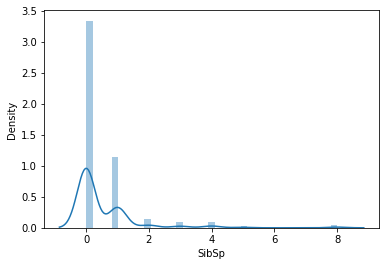

In [143]:
# 시각화로 확인 - 형제자매배우자 컬럼 분포 확인해보기
sns.distplot(data['SibSp'])

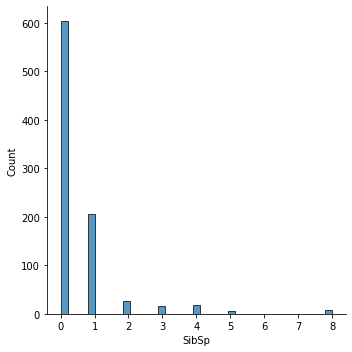

In [144]:
sns.displot(data['SibSp'])

# 시각화 확인해본 결과 6,7값은 없고, 8은 그래도 값이 좀 있는걸로 보아 그렇게 불가능한 숫자는 아니라는 것을 알 수 있음

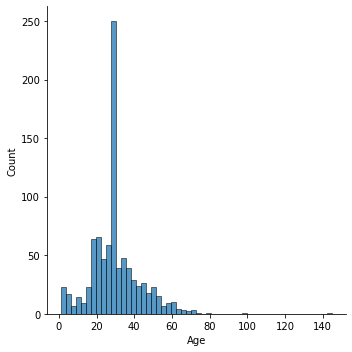

In [145]:
# 나이의 분포도 시각화해보기
sns.displot(data['Age'])

# 시각화 해보니 80세 이상의 분포는 잘 안보여서 추가 확인 필요

<AxesSubplot:ylabel='Age'>

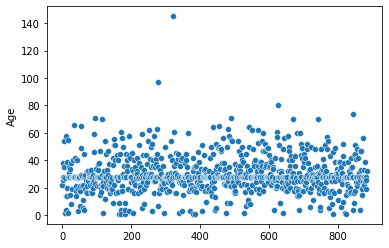

In [146]:
# 산점도, scatterplot : 데이터의 분포를 직관적으로 확인 가능
# x,y축에 넣을 값 정해줘야함

sns.scatterplot(x = data.index, y = data['Age'])
# x축은 테이블에서 몇번째 행의 값인지 말해줌.
# 상단에 툭 튀어나온게 누가봐도 이상치!

<AxesSubplot:ylabel='SibSp'>

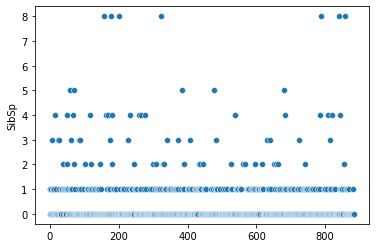

In [147]:
# 형제자매배우자 컬럼도 확인해보기
sns.scatterplot(x = data.index, y = data['SibSp'])

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

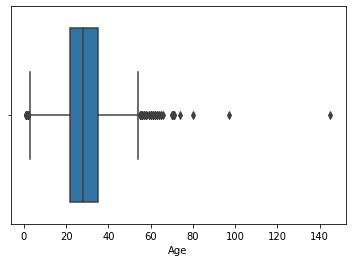

In [148]:
# box plot
sns.boxplot(data['Age'])

# 파란색 박스: 데이터의 25%~75%, 가운데 선이 50% 지점
# 박스플랏에서는 양끝선을 나가는 점들을 아웃라이어라고 함(그냥 이 개념에서 정의한 아웃라이어일뿐 분석 목적에 따라 다르게 정의)
# IQR = 75% - 25%
# IQR*1.5를 기준으로 양끝으로 벗어나는 범위의 값들을 아웃라이어라고 함

In [149]:
# 아웃라이어를 왜 신경써야 하는가?
# > 머신러닝(학습)할 때 아웃라이어 값이 들어있으면 결과의 정확도를 떨어뜨림.
# > train 데이터셋에는 아웃라이어가 포함된 채 학습했는데, 현실에는 그런 값들이 나오지 않으면 학습한 로직이 그다지 working하지 않음

In [150]:
# 아웃라이어 처리 방법
# 1. 제거
# 2. 교체

In [151]:
# 나이 아웃라이어 처리
# 나이 100세 이하인 데이터 개수 확인
# data['Age'] <= 100

# 테이블 출력해보기
# data[data['Age'] <= 100]

# 그 값을 새로운 테이블로 저장
data = data[data['Age'] <= 100]

In [152]:
data['Age'].sort_values()

171     1.0
384     1.0
182     1.0
379     1.0
823     1.0
       ... 
95     71.0
490    71.0
845    74.0
627    80.0
279    97.0
Name: Age, Length: 881, dtype: float64

In [153]:
# 97세가 좀 마음에 걸리므로 특정 나이(대충 80세) 이상 나이는 다 80세로 바꿔주기
# (*현실적으로 97세가 있을법하다면 그냥 냅둬도 됨)

def age_func(x):
    if x > 80:
        return 80
    else:
        return x

In [154]:
age_func(145)

80

In [155]:
# 특정 컬럼에 특정 조건을 걸고 싶다면?
data['Age'].apply(age_func)

0      22.0
1      38.0
2      26.0
3      28.0
4      35.0
       ... 
880    27.0
881    19.0
882    28.0
883    26.0
884    32.0
Name: Age, Length: 881, dtype: float64

In [156]:
# 위 결과를 data['Age']에 넣어주기
data['Age'] = data['Age'].apply(age_func)

# 오류는 무시해도 됨

In [157]:
data['Age'].sort_values()
# 마지막 줄의 97세가 80으로 바뀐것 확인 가능

171     1.0
384     1.0
182     1.0
379     1.0
823     1.0
       ... 
95     71.0
490    71.0
845    74.0
627    80.0
279    80.0
Name: Age, Length: 881, dtype: float64

In [158]:
def new_age_func(x):
    if x > 70:
        return 70
    else:
        return x

In [159]:
new_age_func(73)

70

In [160]:
# 위 똑같은걸 lambda로도 할 수가 있음 > **컬럼에. 적용해줘(람다x: 참일때 출력값, 조건, 거짓을때 출력값)
data['Age'].apply(lambda x: 70 if x > 70 else x)

0      22.0
1      38.0
2      26.0
3      28.0
4      35.0
       ... 
880    27.0
881    19.0
882    28.0
883    26.0
884    32.0
Name: Age, Length: 881, dtype: float64

In [161]:
# ---------------- 중복 데이터 처리 및 데이터 형태 변환 처리 -------------------------------------------

In [162]:
# 
data

,Pclass,Gendr,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,female,28.0,1,0,113803,S,1,1912-03-28
4,3,male,35.0,0,0,373450,S,0,1912-04-03
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,S,0,1912-01-29
881,1,female,19.0,0,0,112053,S,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,S,0,1912-04-07
883,1,male,26.0,0,0,111369,C,1,1912-03-01


In [164]:
# 데이터의 값들을 바꾸는 function

# 컬럼 이름 바꾸기 (rename)
# gendr 컬럼 바꾸기

data.rename({'Gendr': 'Gender'}, axis = 1)

# 업데이트된 값을 data 테이블로 업데이트
data = data.rename({'Gendr': 'Gender'}, axis = 1)

# axis를 안쓰면 행이름을 그대로 써줘야함

In [165]:
# embarked 데이터를 다른 값으로 바꿔주기 
data['Embarked'].replace({'S': 'Southhampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

0      Southhampton
1         Cherbourg
2      Southhampton
3      Southhampton
4      Southhampton
           ...     
880    Southhampton
881    Southhampton
882    Southhampton
883       Cherbourg
884      Queenstown
Name: Embarked, Length: 881, dtype: object

In [166]:
# 데이터 프레임 전체를 바꾸려먼
data.replace({'S': 'Southhampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,Southhampton,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,Cherbourg,1,1912-03-29
2,3,female,26.0,0,0,STON/O2. 3101282,Southhampton,1,1912-02-23
3,1,female,28.0,1,0,113803,Southhampton,1,1912-03-28
4,3,male,35.0,0,0,373450,Southhampton,0,1912-04-03
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,Southhampton,0,1912-01-29
881,1,female,19.0,0,0,112053,Southhampton,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,Southhampton,0,1912-04-07
883,1,male,26.0,0,0,111369,Cherbourg,1,1912-03-01


In [167]:
# 숫자 변환
data.replace({0: 999})

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,999,A/5 21171,S,999,1912-01-12
1,1,female,38.0,1,999,PC 17599,C,1,1912-03-29
2,3,female,26.0,999,999,STON/O2. 3101282,S,1,1912-02-23
3,1,female,28.0,1,999,113803,S,1,1912-03-28
4,3,male,35.0,999,999,373450,S,999,1912-04-03
...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,999,999,211536,S,999,1912-01-29
881,1,female,19.0,999,999,112053,S,1,1912-03-30
882,3,female,28.0,1,2,W./C. 6607,S,999,1912-04-07
883,1,male,26.0,999,999,111369,C,1,1912-03-01


In [168]:
# replace랑 비슷한 map?
# map은 판다스 시리즈에만 작동함. 뒤에 함수 쓸 수도 있음

data['Embarked'].map({'S': 'Southhampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
data['Gender'].map(len)

In [169]:
# map이랑 비슷한 apply?
# 판다스 데이터프레임이랑 시리즈 둘 다 사용 가능
data['Gender'].apply(len)

0      4
1      6
2      6
3      6
4      4
      ..
880    4
881    6
882    6
883    4
884    4
Name: Gender, Length: 881, dtype: int64

In [170]:
# -------------------- 텍스트 데이터 =-------------------------------------

In [172]:
# 데이터 형태 다시 한 번 확인
data.head()

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,female,28.0,1,0,113803,S,1,1912-03-28
4,3,male,35.0,0,0,373450,S,0,1912-04-03


In [173]:
# 데이터타입을 좀 더 확실하게 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 884
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       881 non-null    int64  
 1   Gender       881 non-null    object 
 2   Age          881 non-null    float64
 3   SibSp        881 non-null    int64  
 4   Parch        881 non-null    int64  
 5   Ticket       881 non-null    object 
 6   Embarked     881 non-null    object 
 7   Survived     881 non-null    int64  
 8   ticket_date  881 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 68.8+ KB


In [177]:
sample_txt = 'A/5 21171'

In [178]:
sample_txt

'A/5 21171'

In [181]:
# 특정 위치의 문자 출력
sample_txt[5]

'1'

In [182]:
# 첫번째~3번째 출력
sample_txt[:3]

'A/5'

In [183]:
# 뒷부분 숫자들만 출력
sample_txt[4:]

'21171'

In [184]:
# 뒤에서부터 출력 원할 경우 마이너스 붙이기(첫글자는 -0이 아닌 -1)
sample_txt[-1]

'1'

In [185]:
sample_txt[-5:]

'21171'

In [186]:
# 대소문자 변경
sample_txt.lower()

'a/5 21171'

In [187]:
sample_txt.upper()

'A/5 21171'

In [188]:
# 문자 나누기 (띄어쓰기 기준으로 나눠짐)
sample_txt.split()

['A/5', '21171']

In [189]:
# 띄어쓰기 말고 다른 문자(ex./)기준으로 나누고 싶을때? 괄호 안에 원하는 기준 문자 넣어주기!
sample_txt.split('/')

['A', '5 21171']

In [192]:
# 뒷부분 숫자만 출력하고 싶다면?
sample_txt.split()[-1]

'21171'

In [193]:
# 불필요한 공백 처리
new_txt = ' A/5 21171'

In [194]:
new_txt

' A/5 21171'

In [195]:
# strip함수 (문자 앞뒤의 띄어쓰기 없애줌)
new_txt.strip()

'A/5 21171'

In [197]:
data['Ticket'][:-3]

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
877    C.A./SOTON 34068
878     SOTON/OQ 392076
879              382652
880              211536
881              112053
Name: Ticket, Length: 878, dtype: object

In [198]:
data.head()

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23
3,1,female,28.0,1,0,113803,S,1,1912-03-28
4,3,male,35.0,0,0,373450,S,0,1912-04-03


In [200]:
# 열말고 특정 컬럼에 대한 조건값 출력 (ex. 티켓 컬럼을 뒤에서 5개 숫자)
data['Ticket'].str[-5:]

0      21171
1      17599
2      01282
3      13803
4      73450
       ...  
880    11536
881    12053
882     6607
883    11369
884    70376
Name: Ticket, Length: 881, dtype: object

In [203]:
# 티켓에서 문자를 제외한 뒷부분의 숫자만 가져오기
data['Ticket'].str.split(expand = True)

# expand는 디폴트가 false, 걍 리스트로 출력. true로 바꿔줘야 테이블로 출력
# 테이블이 잘 정리되어 있어서 띄어쓰기가 0,1뿐이었다면 [-1]로 뒷부분 숫자만 출력 가능하지만 지금은 2도 있어서 문제가 복잡해짐

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
880,211536,None,None
881,112053,None,None
882,W./C.,6607,None
883,111369,None,None


In [204]:
# 위 리스트 형태로 둔 상태에서 맨 뒤에서 첫번째로 있는 값들만 불러오기
data['Ticket'].str.split().apply(lambda x: x[-1])

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
880     211536
881     112053
882       6607
883     111369
884     370376
Name: Ticket, Length: 881, dtype: object

In [205]:
data['new_ticket'] = data['Ticket'].str.split().apply(lambda x: x[-1])

In [206]:
data

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,new_ticket
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12,21171
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29,17599
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23,3101282
3,1,female,28.0,1,0,113803,S,1,1912-03-28,113803
4,3,male,35.0,0,0,373450,S,0,1912-04-03,373450
...,...,...,...,...,...,...,...,...,...,...
880,2,male,27.0,0,0,211536,S,0,1912-01-29,211536
881,1,female,19.0,0,0,112053,S,1,1912-03-30,112053
882,3,female,28.0,1,2,W./C. 6607,S,0,1912-04-07,6607
883,1,male,26.0,0,0,111369,C,1,1912-03-01,111369


In [207]:
data.info()
# new_ticket이 어떤 데이터타입인지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       881 non-null    int64  
 1   Gender       881 non-null    object 
 2   Age          881 non-null    float64
 3   SibSp        881 non-null    int64  
 4   Parch        881 non-null    int64  
 5   Ticket       881 non-null    object 
 6   Embarked     881 non-null    object 
 7   Survived     881 non-null    int64  
 8   ticket_date  881 non-null    object 
 9   new_ticket   881 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 75.7+ KB


In [208]:
data['new_ticket'].astype('int')
# 중간에 'line'이라는 문자열이 섞여있어서 숫자로 바꿀 수 없다는 오류 뜸

ValueError: invalid literal for int() with base 10: 'LINE'

In [209]:
text_a = '123'
text_b = 'abc'
txxt_c = '12a'

In [210]:
# 숫자만 있는지 확인
text_a.isdigit()

# 숫자만 있으면 true, 문자도 있으면 false 출력

True

In [211]:
# new_ticket이 숫자로 이루어져있는지 확인
data['new_ticket'].str.isdigit()

0      True
1      True
2      True
3      True
4      True
       ... 
880    True
881    True
882    True
883    True
884    True
Name: new_ticket, Length: 881, dtype: bool

In [212]:
# 위 값 중 false인 것만 출력하고 싶으면? []리스트로 감싸주고 앞에 ~물결 추가!
data[~data['new_ticket'].str.isdigit()]

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,new_ticket
178,3,male,36.0,0,0,LINE,S,0,1912-04-08,LINE
270,3,male,25.0,0,0,LINE,S,1,1912-04-08,LINE
301,3,male,19.0,0,0,LINE,S,0,1912-04-08,LINE
594,3,male,49.0,0,0,LINE,S,0,1912-04-08,LINE


In [213]:
# line이  숫자로 인식되도록 임의로 바꿔주기

data['new_ticket'].replace({'LINE': '999999'})

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
880     211536
881     112053
882       6607
883     111369
884     370376
Name: new_ticket, Length: 881, dtype: object

In [214]:
# data['new_ticket']이름으로 업데이트
data['new_ticket'] = data['new_ticket'].replace({'LINE': '999999'})

In [215]:
# 뉴티켓이 모두 숫자로 이루어졌는지 다시 한번 확인

data['new_ticket'].str.isdigit()

0      True
1      True
2      True
3      True
4      True
       ... 
880    True
881    True
882    True
883    True
884    True
Name: new_ticket, Length: 881, dtype: bool

In [216]:
data['new_ticket'].astype('int')

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
880     211536
881     112053
882       6607
883     111369
884     370376
Name: new_ticket, Length: 881, dtype: int64

In [217]:
# 데이터 형태 변경하는 다른 방법
pd.to_numeric(data['new_ticket'])

# 확인 후 테이블 업데이트
data['new_ticket'] = pd.to_numeric(data['new_ticket'])

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
880     211536
881     112053
882       6607
883     111369
884     370376
Name: new_ticket, Length: 881, dtype: int64

In [218]:
# -------------------------- 날짜 및 시간 데이터 처리 ---------------------------------------------

In [220]:
data.head()

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,new_ticket
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12,21171
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29,17599
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23,3101282
3,1,female,28.0,1,0,113803,S,1,1912-03-28,113803
4,3,male,35.0,0,0,373450,S,0,1912-04-03,373450


In [221]:
from datetime import datetime

In [223]:
sample_date = datetime.strptime('2023-01-01', '%Y-%m-%d')

In [226]:
sample_date

datetime.datetime(2023, 1, 1, 0, 0)

In [228]:
# datetime 을 str로 바꾸기
datetime.strftime(sample_date, '%Y-%b-%d')

'2023-Jan-01'

In [229]:
# 연도 출력
sample_date.year

2023

In [231]:
# 월 출력
sample_date.month

1

In [233]:
next_date = datetime.strptime('2023-05-05', '%Y-%m-%d')

In [234]:
# 날짜간의 차이를 계산하고 싶으면 datetime함수 사용
next_date - sample_date

datetime.timedelta(days=124)

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       881 non-null    int64  
 1   Gender       881 non-null    object 
 2   Age          881 non-null    float64
 3   SibSp        881 non-null    int64  
 4   Parch        881 non-null    int64  
 5   Ticket       881 non-null    object 
 6   Embarked     881 non-null    object 
 7   Survived     881 non-null    int64  
 8   ticket_date  881 non-null    object 
 9   new_ticket   881 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 75.7+ KB


In [238]:
# 데이터타입이 object인 티켓데이트를 datetime으로 바꿔주고, data['ticket_date']로 업데이트 저장
data['ticket_date'] = pd.to_datetime(data['ticket_date'])

In [239]:
data.info()

# ticket_date가 datetime으로 잘 바뀌었는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 884
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Pclass       881 non-null    int64         
 1   Gender       881 non-null    object        
 2   Age          881 non-null    float64       
 3   SibSp        881 non-null    int64         
 4   Parch        881 non-null    int64         
 5   Ticket       881 non-null    object        
 6   Embarked     881 non-null    object        
 7   Survived     881 non-null    int64         
 8   ticket_date  881 non-null    datetime64[ns]
 9   new_ticket   881 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 75.7+ KB


In [241]:
# 티켓날짜의 연도만 출력하기 (year, day, month 등으로 다양한 값 출력 가능)
data['ticket_date'].dt.year

0      1912
1      1912
2      1912
3      1912
4      1912
       ... 
880    1912
881    1912
882    1912
883    1912
884    1912
Name: ticket_date, Length: 881, dtype: int64

In [242]:
# 사고날짜 세팅
acc = datetime.strptime('1912-04-15', '%Y-%m-%d')

In [243]:
# 사고 날짜와 티켓 구매일 간의 차이 구해서 새로운 컬럼으로 저장
data['buy_before'] = acc - data['ticket_date']

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 884
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   Pclass       881 non-null    int64          
 1   Gender       881 non-null    object         
 2   Age          881 non-null    float64        
 3   SibSp        881 non-null    int64          
 4   Parch        881 non-null    int64          
 5   Ticket       881 non-null    object         
 6   Embarked     881 non-null    object         
 7   Survived     881 non-null    int64          
 8   ticket_date  881 non-null    datetime64[ns] 
 9   new_ticket   881 non-null    object         
 10  buy_before   881 non-null    timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 82.6+ KB


In [246]:
data.head()

,Pclass,Gender,Age,SibSp,Parch,Ticket,Embarked,Survived,ticket_date,new_ticket,buy_before
0,3,male,22.0,1,0,A/5 21171,S,0,1912-01-12,21171,94 days
1,1,female,38.0,1,0,PC 17599,C,1,1912-03-29,17599,17 days
2,3,female,26.0,0,0,STON/O2. 3101282,S,1,1912-02-23,3101282,52 days
3,1,female,28.0,1,0,113803,S,1,1912-03-28,113803,18 days
4,3,male,35.0,0,0,373450,S,0,1912-04-03,373450,12 days


In [247]:
# 숫자 형태로 변환 (datetime형태에서는 전체에 +10일 하는 등의 계산 불가. int로 변경해주면 가능해짐)
data['buy_before'] = data['buy_before'].dt.days

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 884
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Pclass       881 non-null    int64         
 1   Gender       881 non-null    object        
 2   Age          881 non-null    float64       
 3   SibSp        881 non-null    int64         
 4   Parch        881 non-null    int64         
 5   Ticket       881 non-null    object        
 6   Embarked     881 non-null    object        
 7   Survived     881 non-null    int64         
 8   ticket_date  881 non-null    datetime64[ns]
 9   new_ticket   881 non-null    object        
 10  buy_before   881 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 82.6+ KB
